<a href="https://colab.research.google.com/github/Rupesh-Kataria/Object-Count/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv

In [53]:
from google.colab.patches import cv2_imshow

In [1]:
!pip install cvlib

In [3]:
from numpy.lib.polynomial import poly

In [226]:
image=cv2.imread("/content/Bottles.jpg",cv2.IMREAD_UNCHANGED)

In [30]:
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


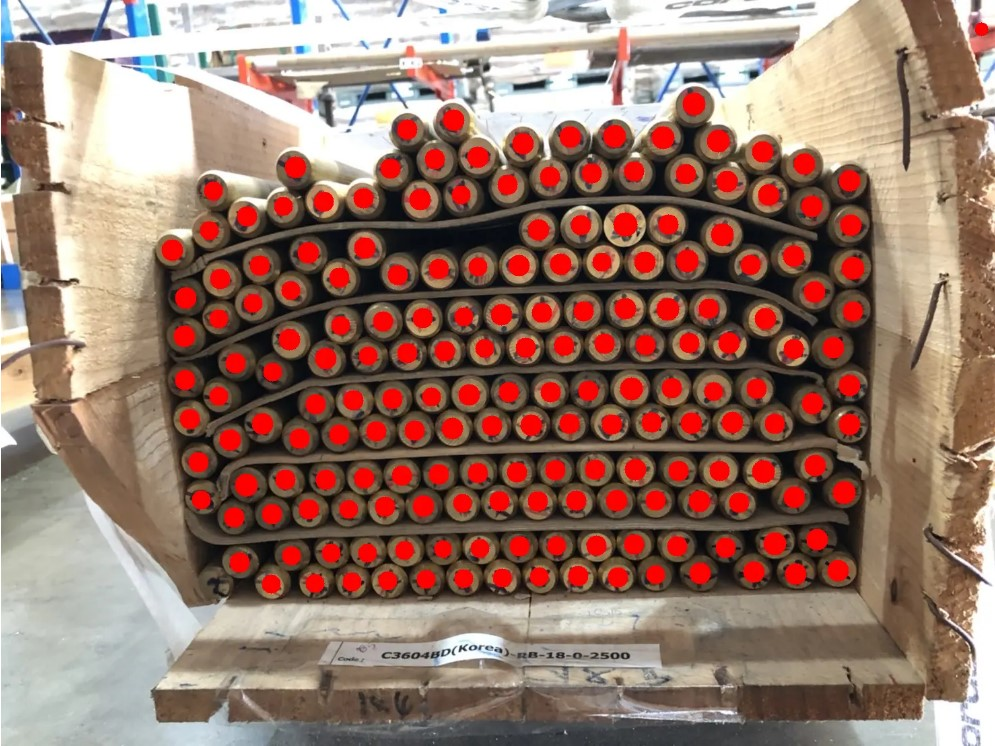

In [227]:
cv2_imshow(image)

In [8]:
!pwd

/content


In [14]:
from cvlib.object_detection import draw_bbox

In [20]:
# box,label,count=cv.detect_common_objects(image)
output=draw_bbox(image,box,label,count)

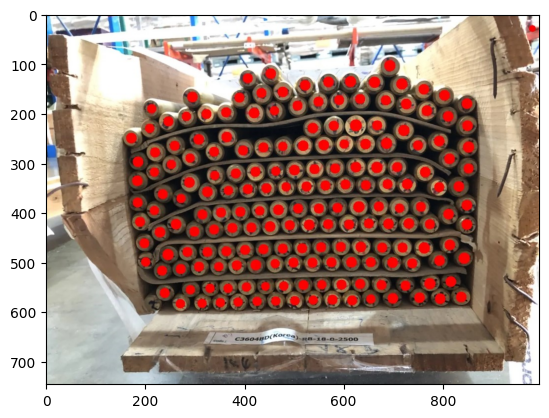

In [21]:
plt.imshow(output)

In [32]:
height, width, num_channels = image.shape
print("Image shape:", height, "x", width, "x", num_channels)

Image shape: 746 x 995 x 3


In [104]:
image2=cv2.imread("/content/Bottles (1).jpg",cv2.IMREAD_UNCHANGED)
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [54]:
cv2_imshow(image2)

In [84]:
result = cv2.matchTemplate(image,image2, cv2.TM_CCOEFF_NORMED)

In [58]:
result.shape

(716, 960)

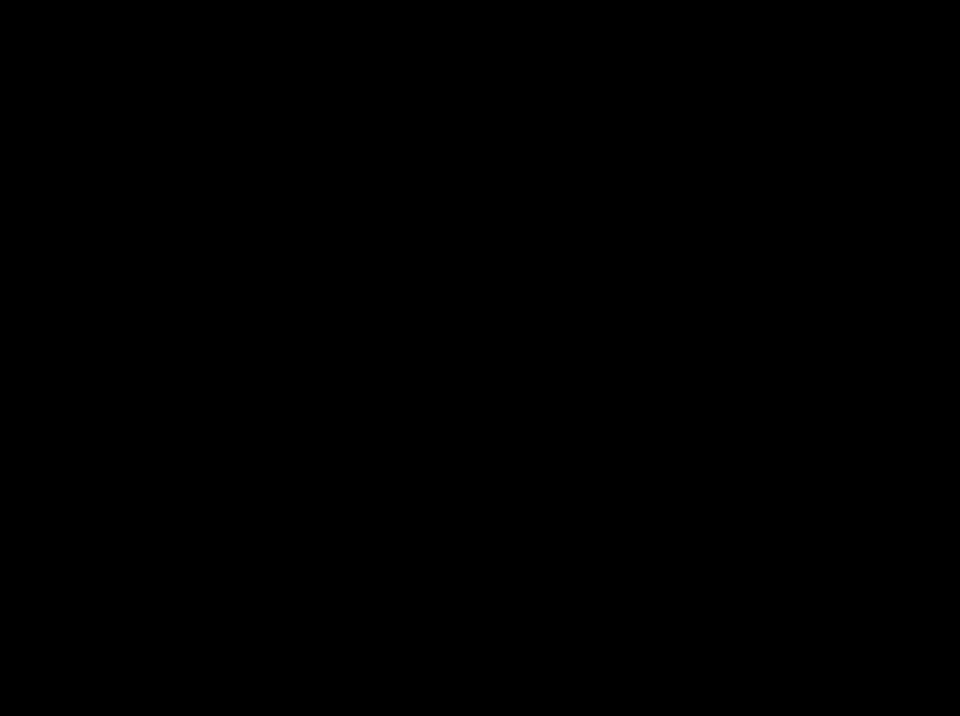

In [85]:
cv2_imshow(result)

In [86]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print('Best match top left position: %s' % str(max_loc))
print('Best match confidence: %s' % max_val)

Best match top left position: (677, 87)
Best match confidence: 0.9966676831245422


In [87]:
needle_w = image2.shape[1]
needle_h = image2.shape[0]
top_left = max_loc
bottom_right = (top_left[0] + needle_w, top_left[1] + needle_h)

array([[[255, 255, 220],
        [214, 158, 109],
        [238, 163,  95],
        ...,
        [254, 254, 254],
        [254, 255, 253],
        [254, 255, 253]],

       [[255, 255, 221],
        [214, 161, 111],
        [235, 161,  95],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[255, 255, 221],
        [212, 161, 111],
        [231, 161,  94],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       ...,

       [[251, 255, 254],
        [204, 209, 207],
        [203, 209, 204],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 255, 254],
        [198, 203, 201],
        [198, 204, 199],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 255, 253],
        [196, 201, 199],
        [196, 202, 197],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
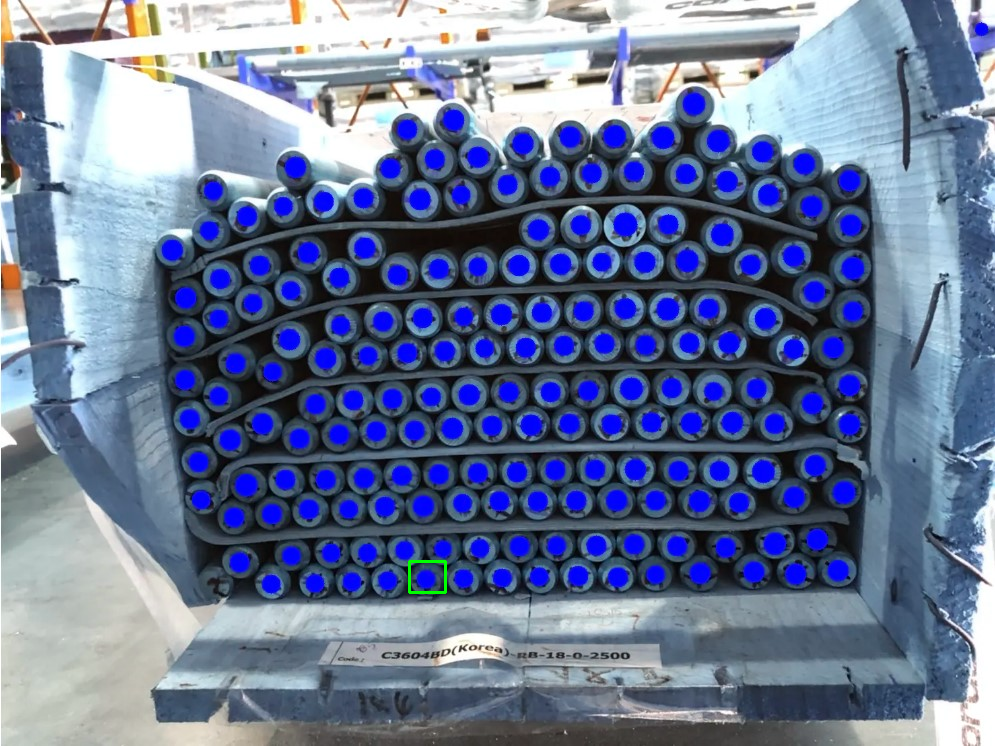

In [109]:
cv2.rectangle(image, top_left, bottom_right, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_4)


In [130]:
threshold = 0.35
locations = np.where(result >= threshold)
print(locations)

(array([  0,   0,   0, ..., 715, 715, 715]), array([845, 846, 847, ..., 692, 693, 694]))


In [131]:
locations = list(zip(*locations[::-1]))
print(locations)
# locations will now look like this:

[(845, 0), (846, 0), (847, 0), (848, 0), (849, 0), (850, 0), (851, 0), (852, 0), (853, 0), (845, 1), (846, 1), (847, 1), (848, 1), (849, 1), (850, 1), (851, 1), (852, 1), (959, 6), (958, 7), (959, 7), (958, 8), (959, 8), (958, 9), (959, 9), (957, 10), (958, 10), (959, 10), (957, 11), (958, 11), (959, 11), (957, 12), (958, 12), (959, 12), (957, 13), (958, 13), (959, 13), (957, 14), (958, 14), (959, 14), (957, 15), (958, 15), (959, 15), (957, 16), (958, 16), (959, 16), (927, 17), (928, 17), (929, 17), (957, 17), (958, 17), (959, 17), (927, 18), (928, 18), (929, 18), (930, 18), (957, 18), (958, 18), (959, 18), (927, 19), (928, 19), (929, 19), (930, 19), (958, 19), (959, 19), (927, 20), (928, 20), (929, 20), (930, 20), (958, 20), (959, 20), (607, 21), (608, 21), (609, 21), (610, 21), (928, 21), (929, 21), (930, 21), (959, 21), (604, 22), (605, 22), (606, 22), (607, 22), (608, 22), (609, 22), (610, 22), (611, 22), (928, 22), (929, 22), (930, 22), (601, 23), (602, 23), (603, 23), (604, 23), 

Found needle.


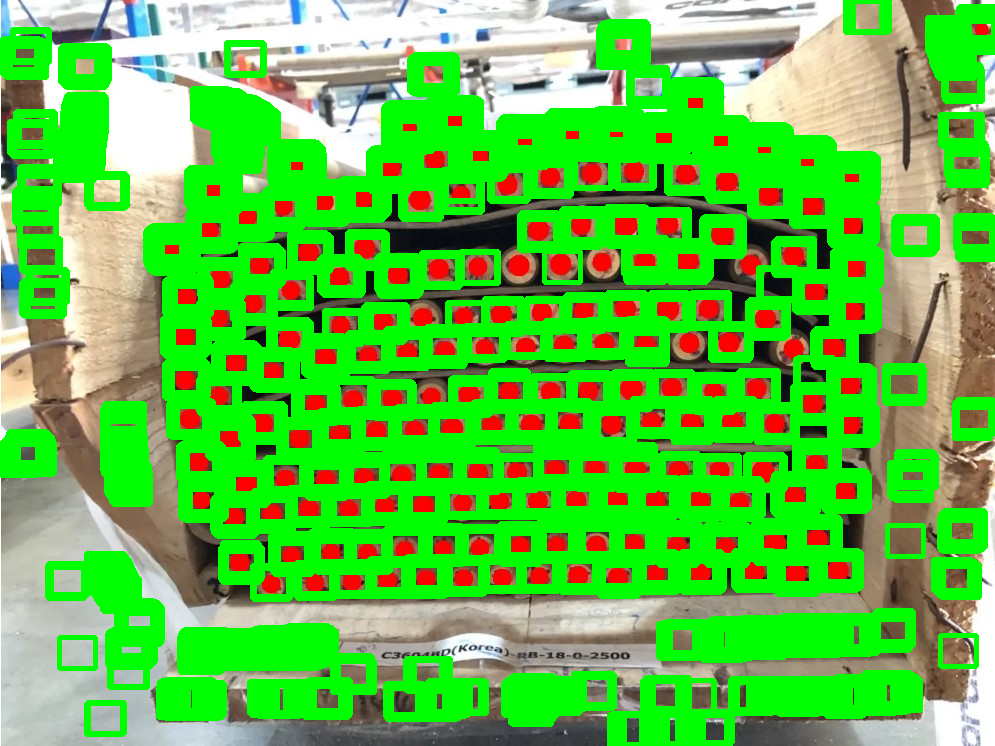

In [132]:
if locations:
    print('Found needle.')

    needle_w = image2.shape[1]
    needle_h = image2.shape[0]
    line_color = (0, 255, 0)
    line_type = cv2.LINE_4

    # Loop over all the locations and draw their rectangle
    for loc in locations:
        # Determine the box positions
        top_left = loc
        bottom_right = (top_left[0] + needle_w, top_left[1] + needle_h)
        # Draw the box
        cv2.rectangle(image, top_left, bottom_right, line_color, line_type)

    cv2_imshow(image)

else:
    print('Needle not found.')

In [133]:
bottle_gray = cv2.imread('/content/Bottles.jpg', cv2.IMREAD_GRAYSCALE)

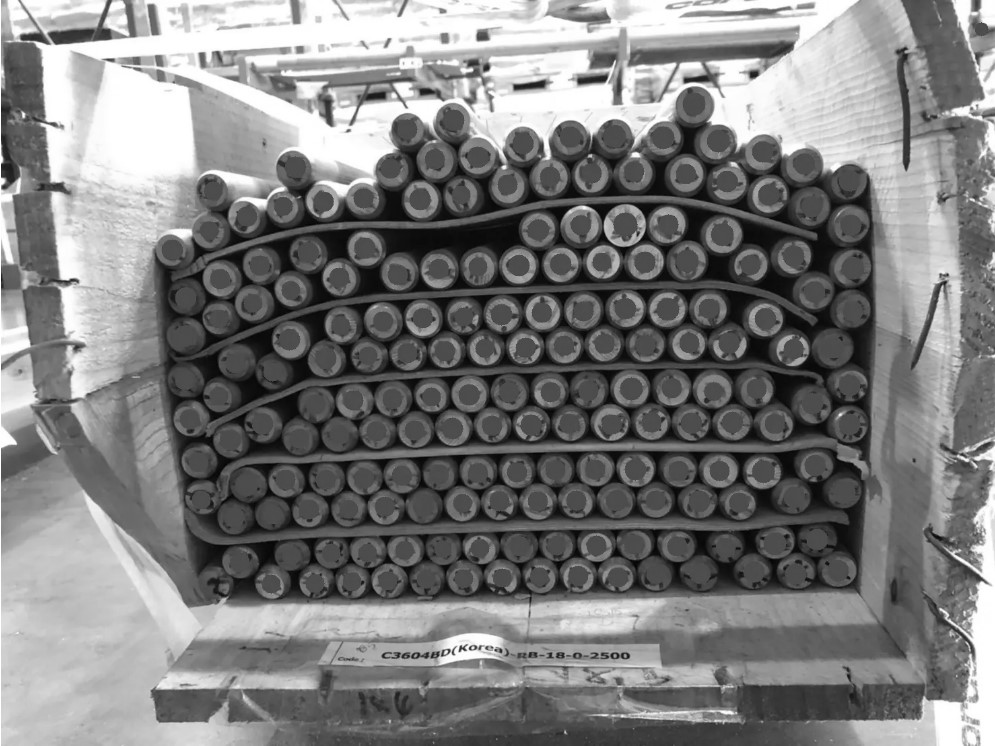

In [134]:
cv2_imshow(bottle_gray)

In [135]:
bottle_gray.shape

(746, 995)

In [148]:
# bottle_gray[(bottle_gray >= 230) & (bottle_gray <= 255)] = 0

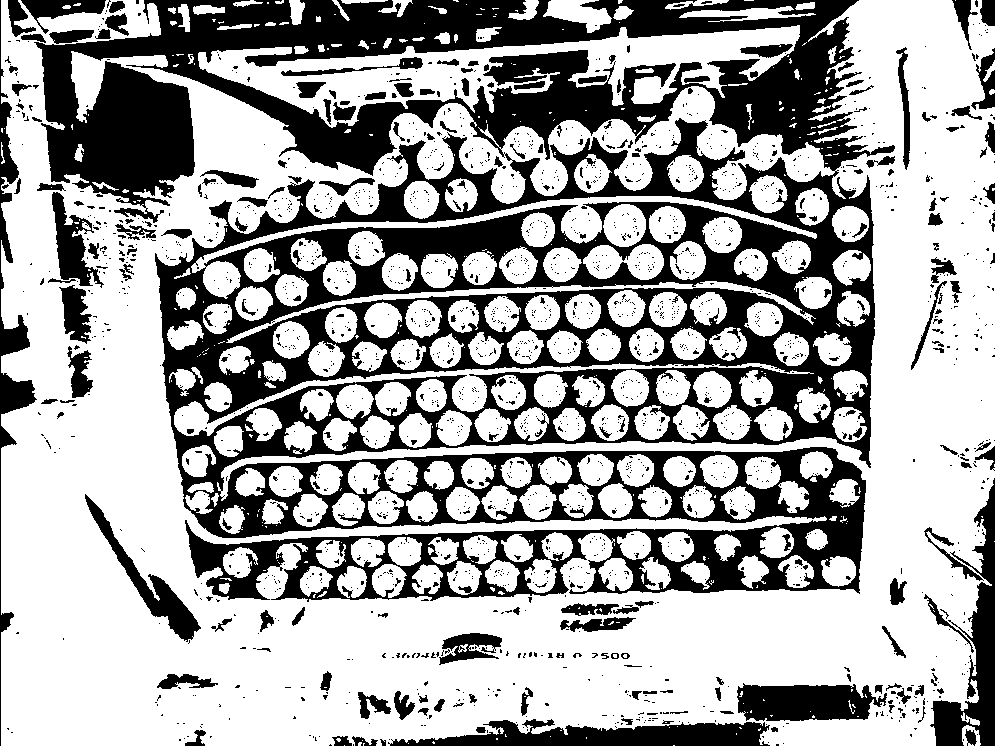

In [159]:
# threshold_value = 72
# _, binary_image = cv2.threshold(bottle_gray, threshold_value, 255, cv2.THRESH_BINARY)
# cv2_imshow(binary_image)

In [160]:
# kernel = np.ones((2, 2), np.uint8)
# binary_image = cv2.dilate(binary_image, kernel, iterations=2)

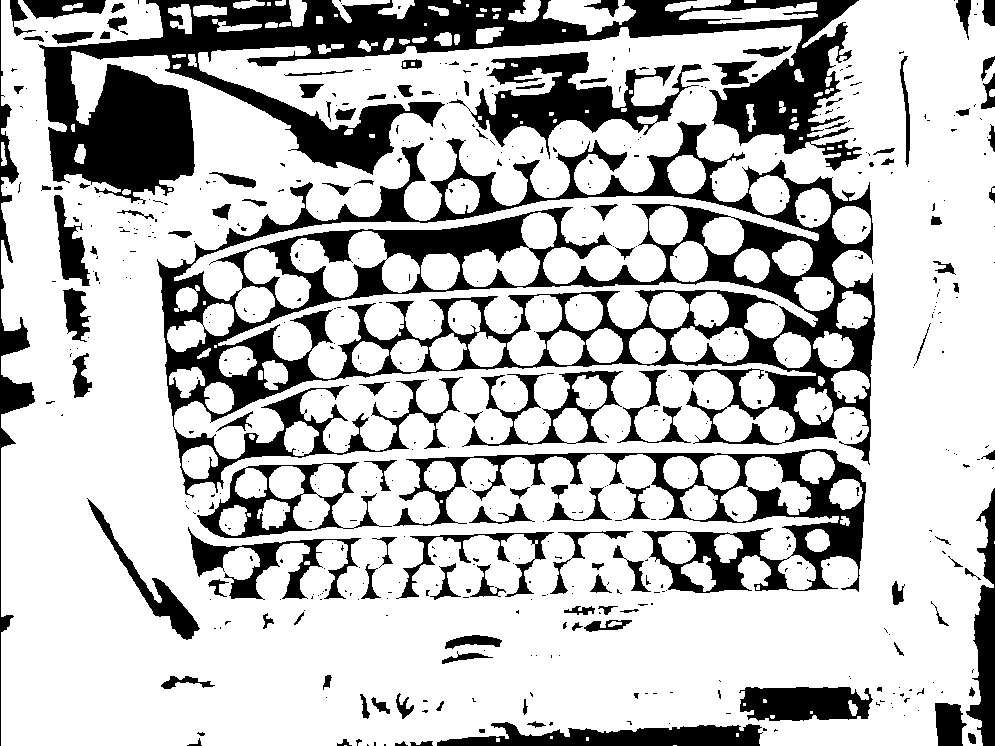

In [161]:
# cv2_imshow(binary_image)

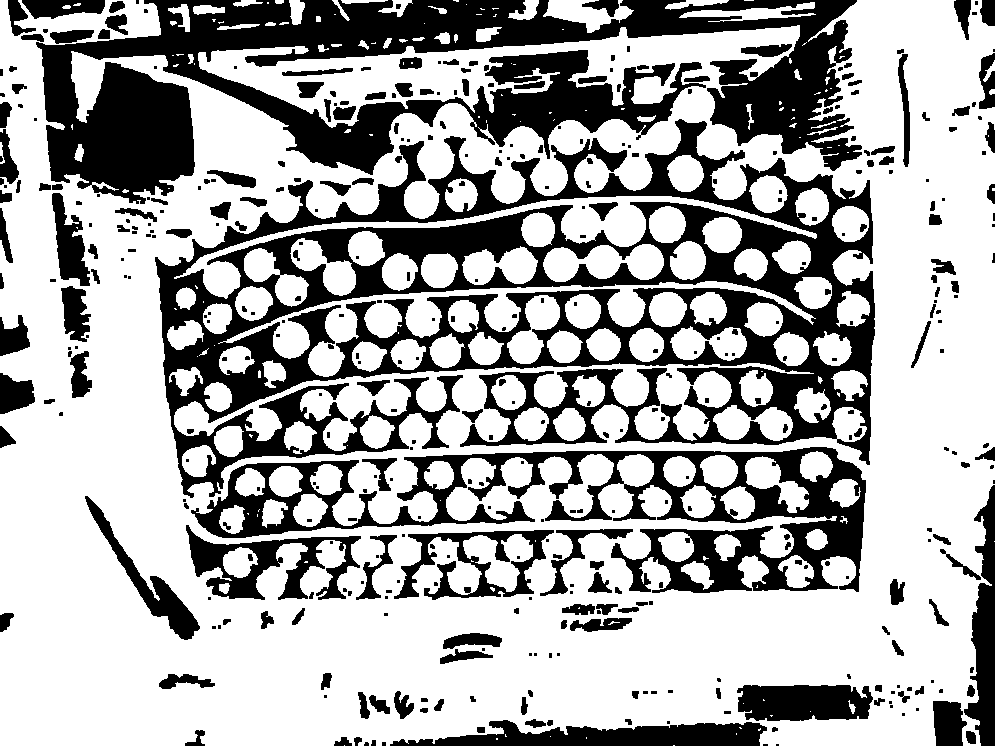

In [155]:
# binary_image = cv2.erode(binary_image, kernel, iterations=1)
# cv2_imshow(binary_image)

In [188]:
mask_array = np.full_like(bottle_gray, 255)
mask = np.logical_and(bottle_gray >= 75, bottle_gray <=80)

In [189]:
mask_array[mask] = 0

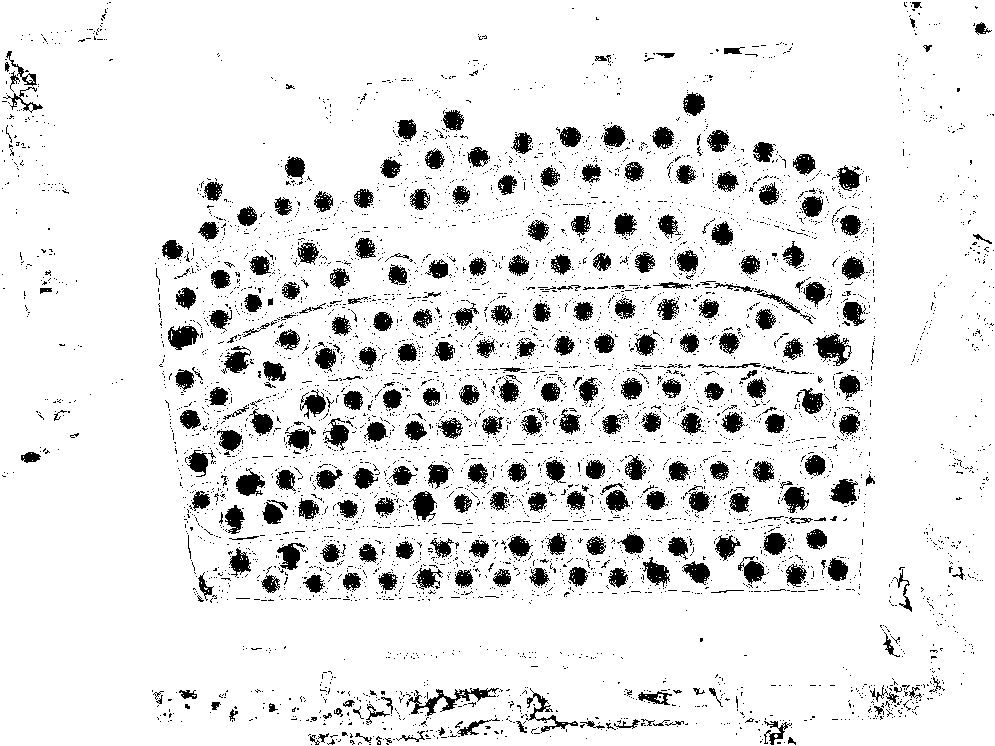

In [190]:
cv2_imshow(mask_array)

In [171]:
kernel = np.ones((2, 2), np.uint8)
binary_image = cv2.dilate(mask_array, kernel, iterations=1)

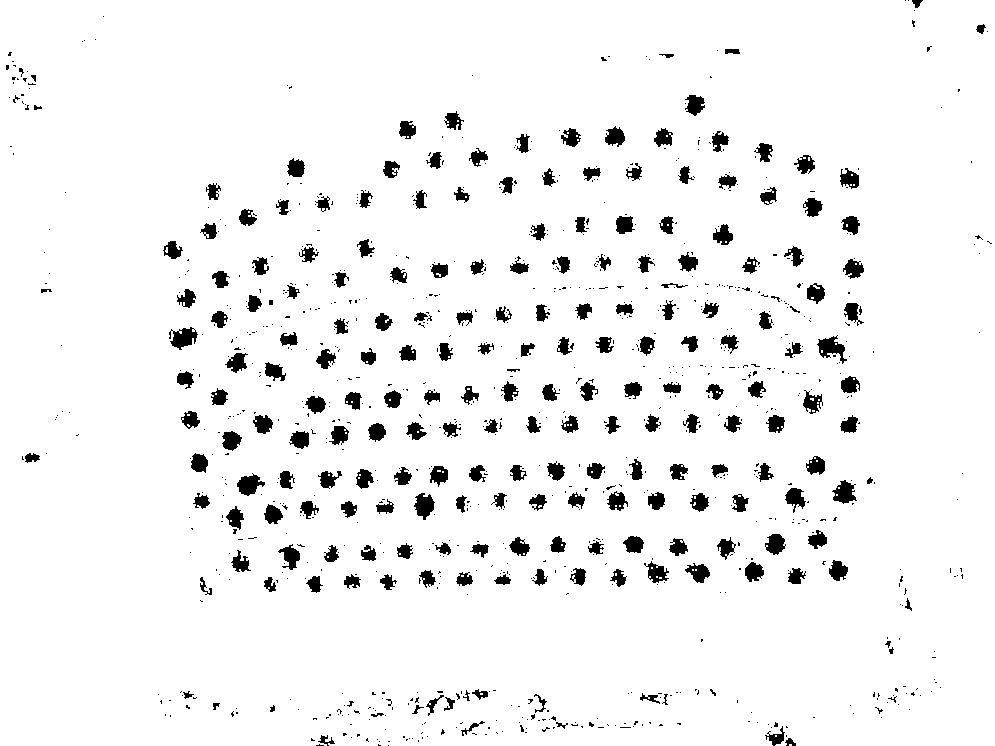

In [172]:
cv2_imshow(binary_image)

In [173]:
kernel = np.ones((2, 2), np.uint8)
binary_image = cv2.dilate(binary_image, kernel, iterations=1)

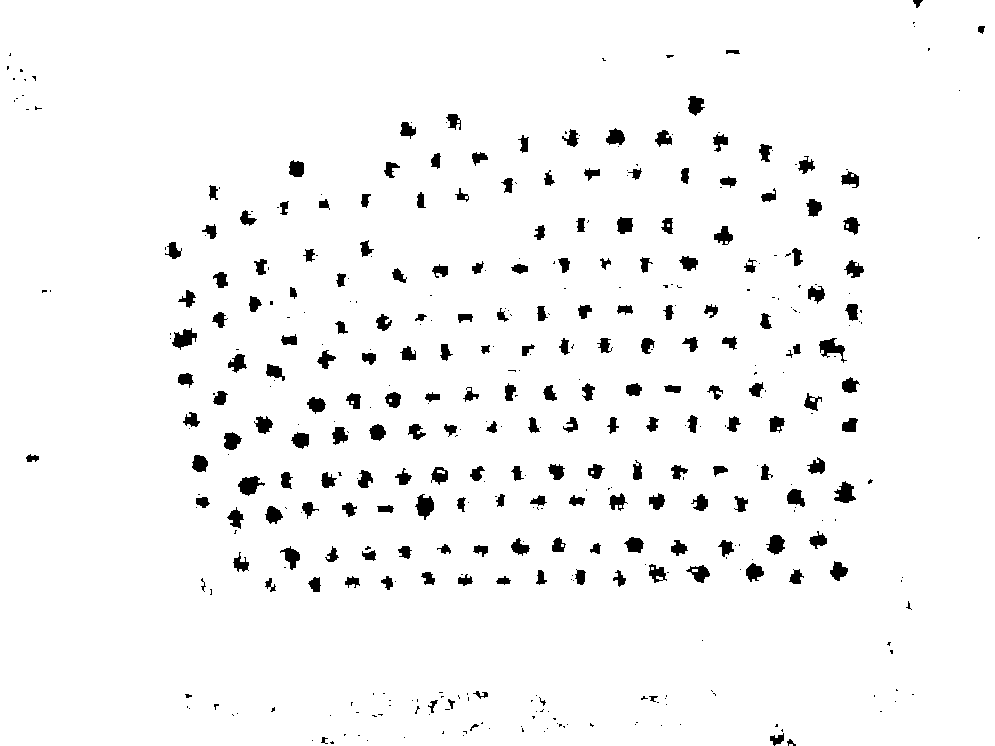

In [192]:
cv2_imshow(binary_image)

In [202]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and draw a bounding box around it
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(approx)

    # Draw the bounding box in red color (BGR format)
    cv2.rectangle(mask_array, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Count the number of detected holes
num_holes = len(contours)

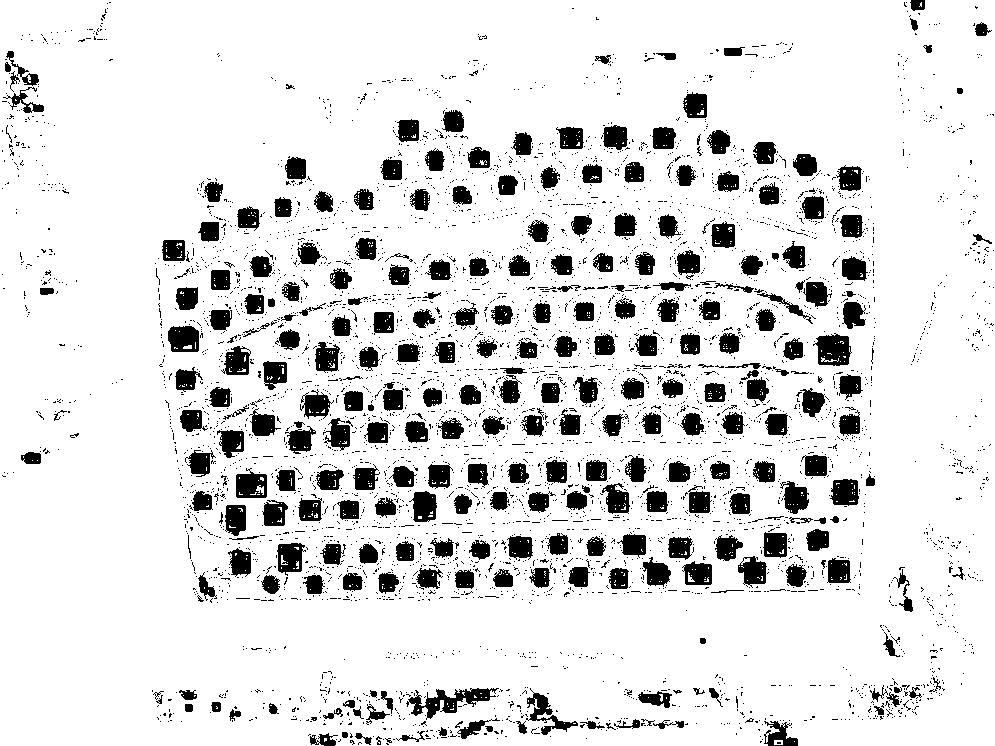

In [205]:
cv2_imshow(mask_array)

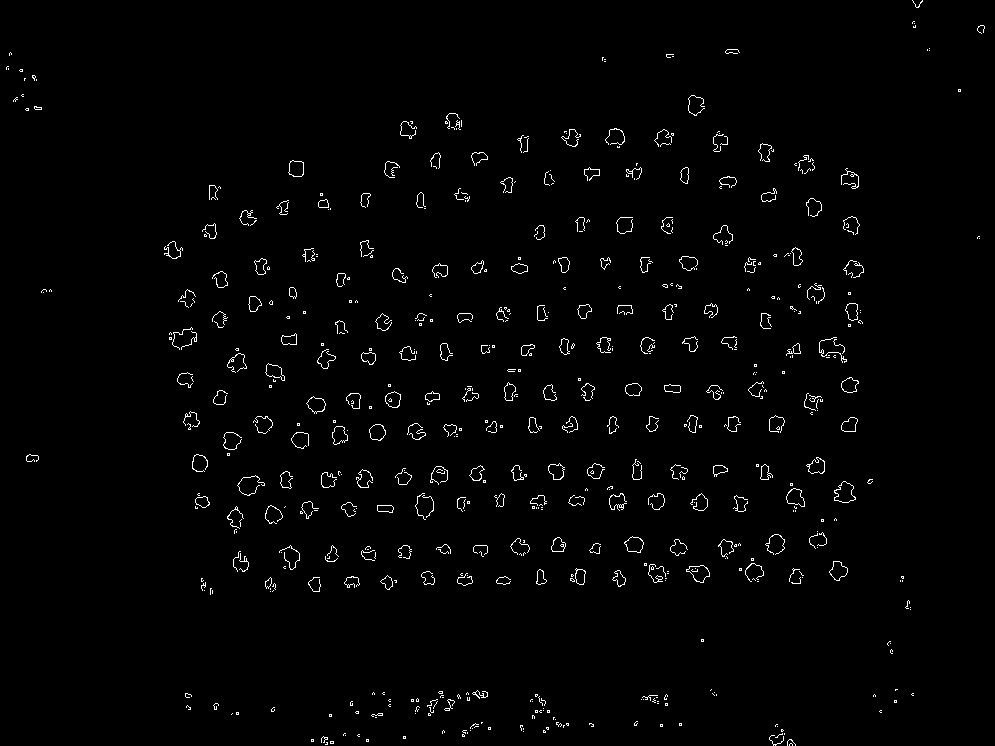

In [206]:
edges = cv2.Canny(binary_image, 100, 200)
cv2_imshow(edges)

In [220]:
kernel = np.ones((1,1), np.uint8)  # Adjust the kernel size as needed

# Perform erosion
eroded_edges = cv2.erode(edges, kernel, iterations=3)

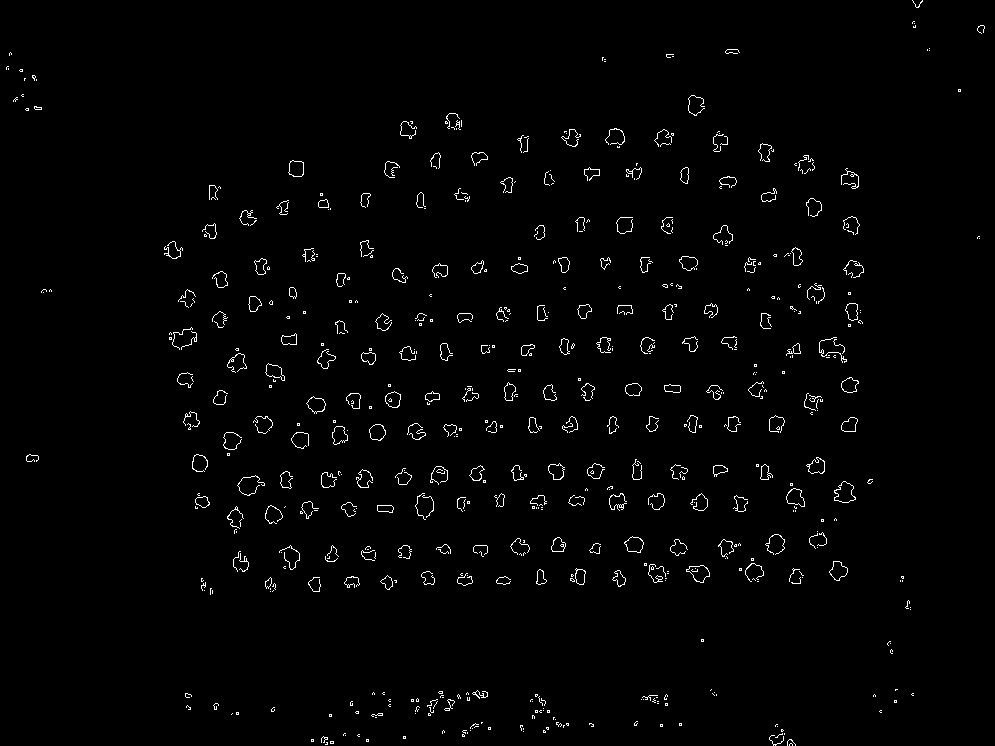

In [221]:
cv2_imshow(eroded_edges)

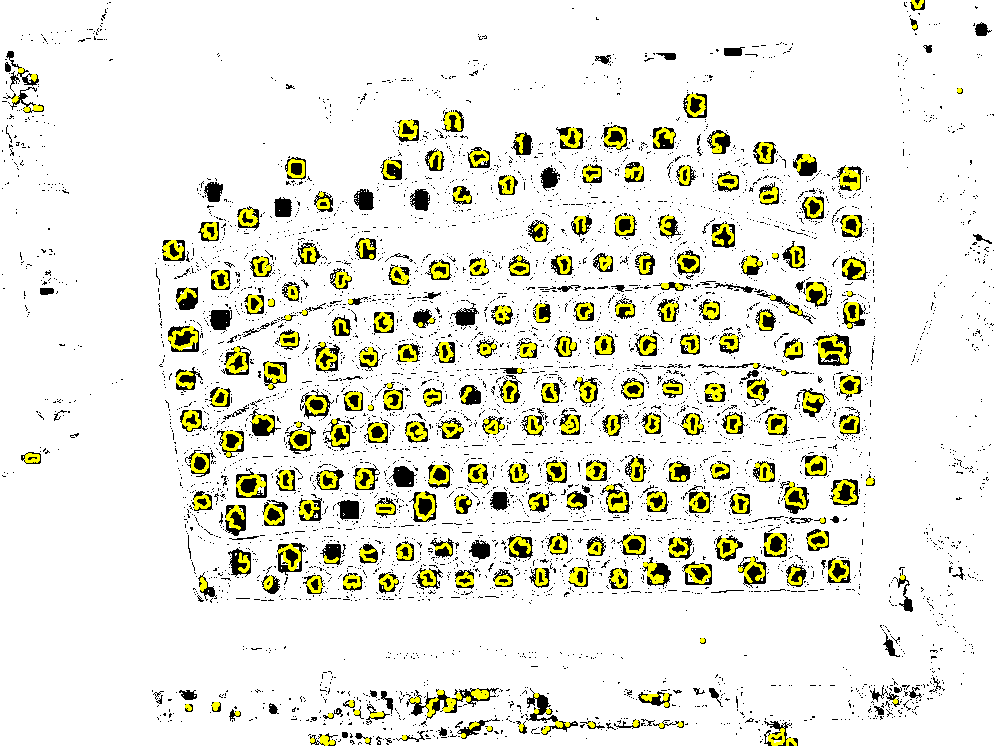

In [245]:
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
im=image.copy()
gray=mask_array.copy()
color = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
d_contours = [cnt for cnt in contours if cv2.contourArea(cnt) >0.7]
cv2.drawContours(color, d_contours, -1, (0, 255, 255), 2)
cv2_imshow(color)

In [242]:
print("Number of contours drawn:", len(d_contours))


Number of contours drawn: 295


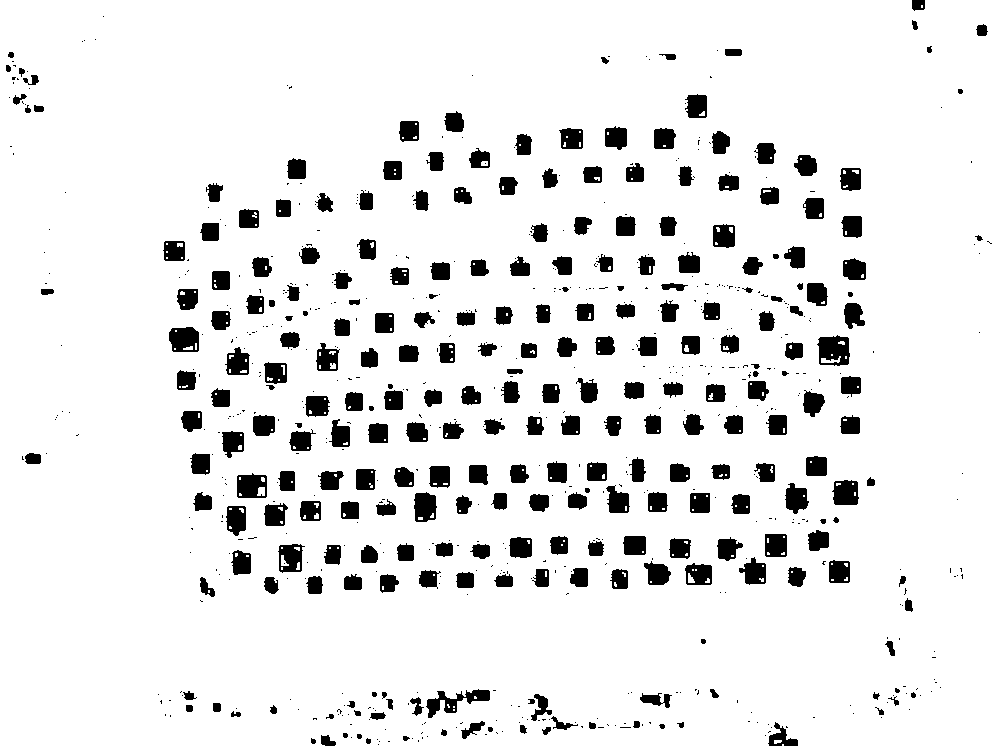

In [230]:
cv2_imshow(dilated_edges)

In [224]:
kernel = np.ones((2,2), np.uint8)  # Adjust the kernel size as needed

# Perform dilation
dilated_edges = cv2.dilate(mask_array, kernel, iterations=1)

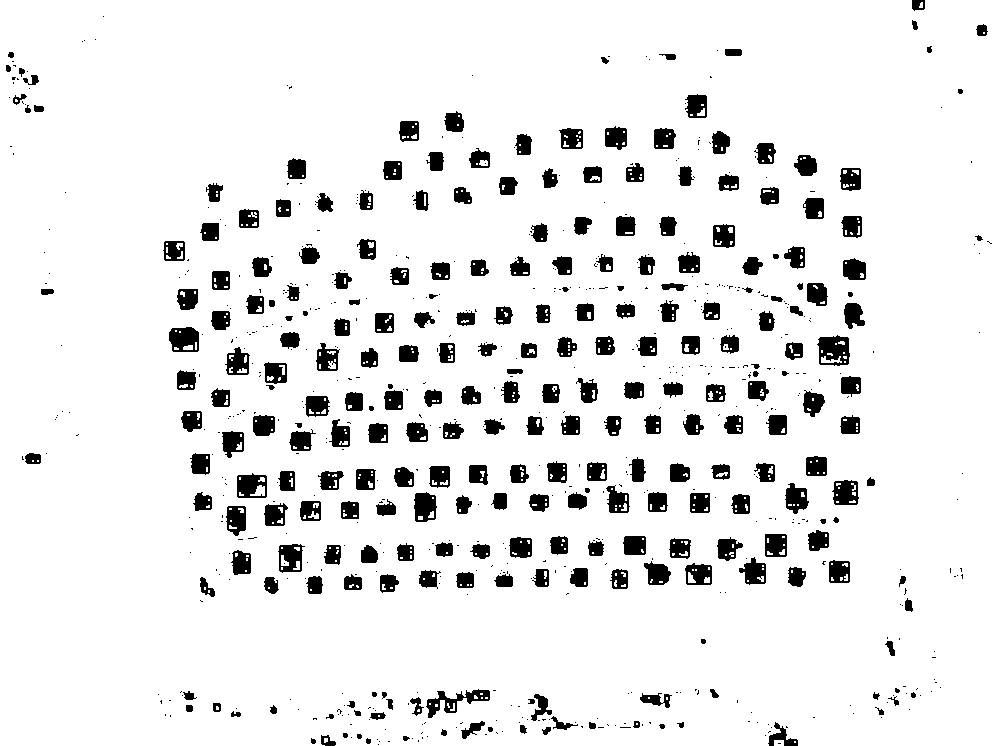

In [212]:
cv2_imshow(dilated_edges)

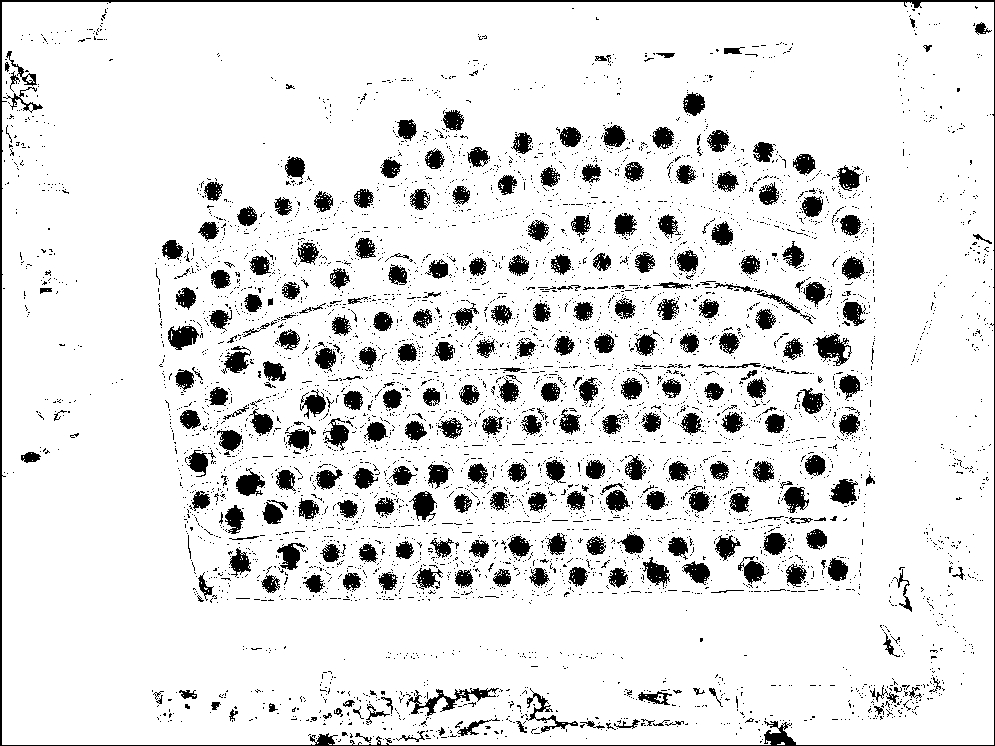

In [185]:
cv2_imshow(mask_array)

In [184]:
print(num_holes)

12


array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       ...,
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
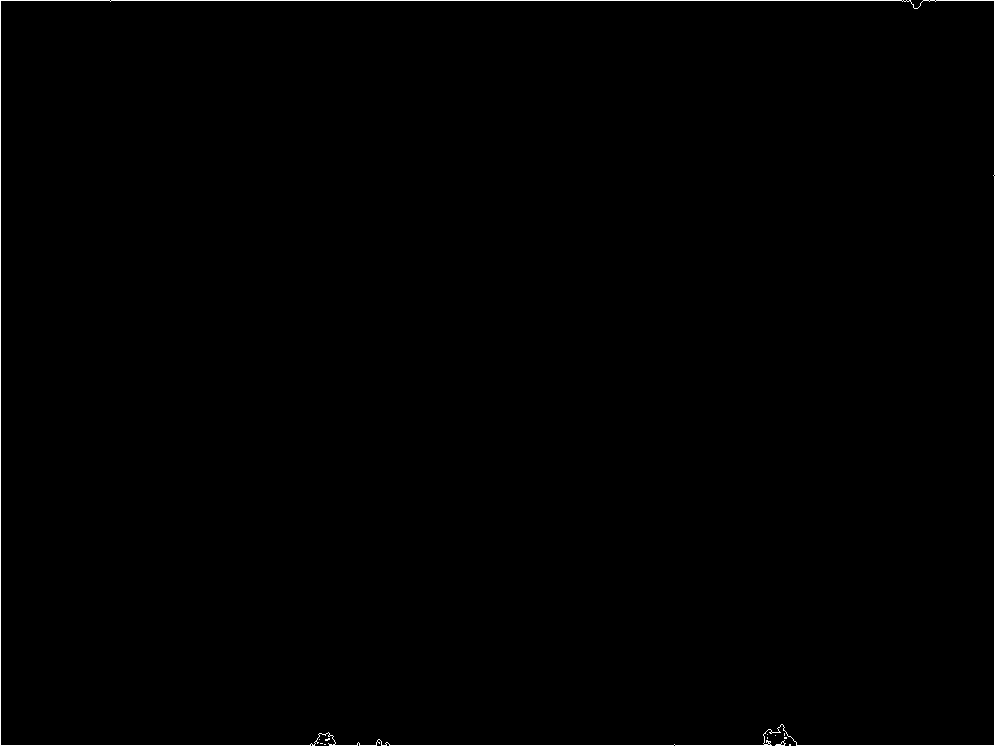

In [181]:
contour_image = np.zeros_like(mask_array)

# Draw contours on the contour image
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 1)


In [10]:
faces, confidences = cv.detect_face(image, enable_gpu=True)


[]


In [20]:


!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2024-05-11 04:20:45--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  15.1MB/s    in 16s     

2024-05-11 04:21:02 (15.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-05-11 04:21:02--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [246]:
image_y=cv2.imread("/content/Parking Lot.jpeg")

In [261]:
image_y.shape

(550, 850, 3)

In [247]:
box,label,count=cv.detect_common_objects(image_y)
output=draw_bbox(image_y,box,label,count)

In [250]:
print(len(count))

47


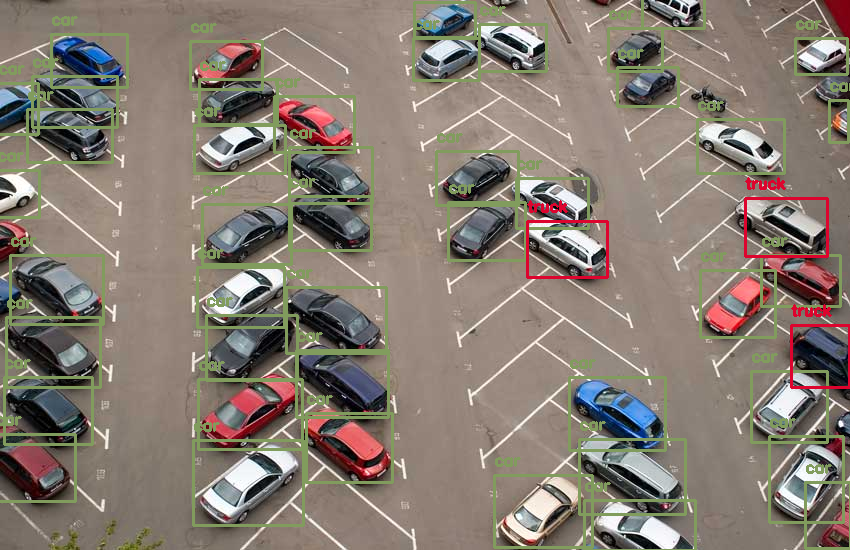

In [248]:
cv2_imshow(output)

In [254]:
box,label,count=cv.detect_common_objects(image)
output=draw_bbox(image,box,label,count)

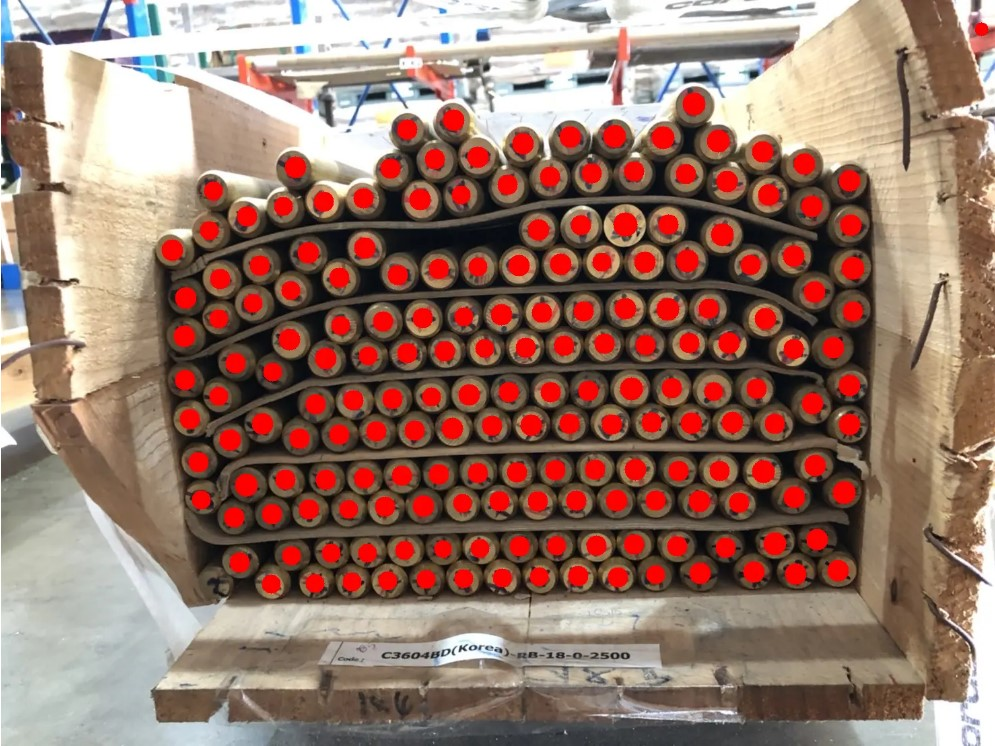

In [252]:
cv2_imshow(output)

In [255]:
image_z=cv2.imread("/content/Furniture.png")

In [260]:
image_z.shape

(230, 230, 3)

In [264]:
resized_image = cv2.resize(image_z.copy(), (850, 550))

In [266]:
box,label,count=cv.detect_common_objects(resized_image)
output=draw_bbox(resized_image,box,label,count)

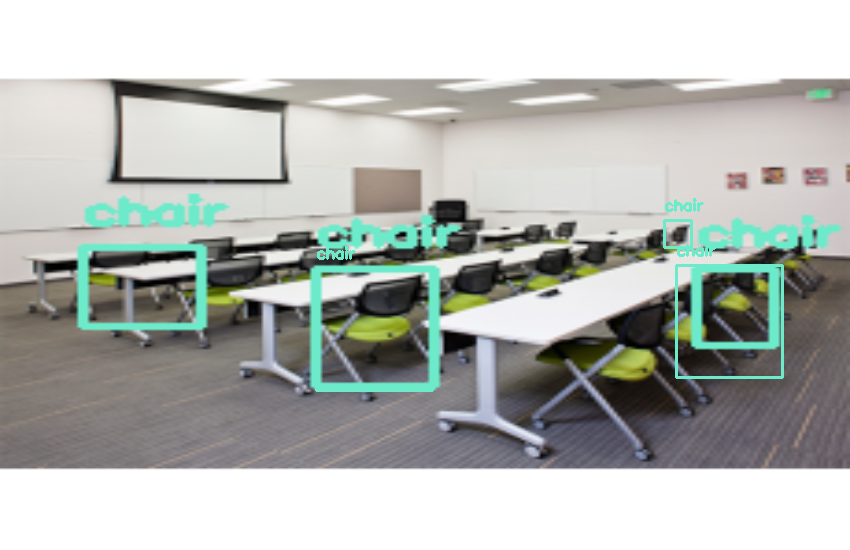

In [267]:
cv2_imshow(output)

In [263]:
print(len(count))

3


In [271]:
image_k=cv2.imread("/content/Dolphins.jpg")
image_k=cv2.resize(image_k.copy(), (850, 550))

In [272]:
box,label,count=cv.detect_common_objects(image_k)
output=draw_bbox(image_k,box,label,count)

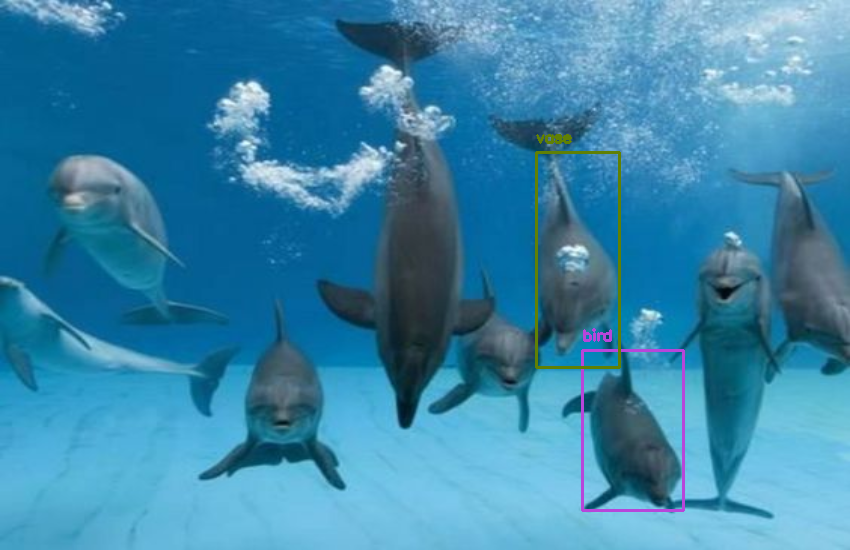

In [273]:
cv2_imshow(output)